## Implementing the simple chat bot 


In [1]:
from typing_extensions import TypedDict
from typing import Annotated

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages 


Annotation is just used for the list of all messages will ad in list

All messages will be append in the list

In [2]:
class State(TypedDict):
    messages:Annotated[list, add_messages]

In [5]:
import os
from dotenv import load_dotenv

# Load variables from .env file into environment
load_dotenv()

# Ensure GROQ_API_KEY is available as an environment variable
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")


In [15]:
from langchain_groq import ChatGroq
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Use a different model: mixtral-8x7b-32768
llm = ChatGroq(
    model="llama3-70b-8192",
    api_key=os.getenv("GROQ_API_KEY")
)

# Make a test call
response = llm.invoke("What's the difference between AI and machine learning?")
print(response.content)


Artificial Intelligence (AI) and Machine Learning (ML) are often used interchangeably, but they're not exactly the same thing. Here's a breakdown of the differences:

**Artificial Intelligence (AI):**

AI refers to the broader field of research and development aimed at creating machines that can perform tasks that typically require human intelligence, such as:

1. Learning
2. Problem-solving
3. Reasoning
4. Perception
5. Understanding

AI involves creating intelligent machines that can think, learn, and act like humans. The goal of AI is to create machines that can perform any intellectual task that a human can.

**Machine Learning (ML):**

Machine Learning is a subset of AI that specifically focuses on developing algorithms and statistical models that enable machines to learn from data, without being explicitly programmed.

In other words, ML is a type of AI that allows systems to improve their performance on a task over time, based on the data they receive. This is achieved through v

# We will start the creating the nodes


In [18]:
def superbot(state:State):
    return{"messages":[llm.invoke(state["messages"])]}

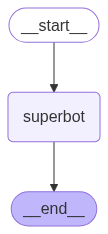

In [20]:
graph = StateGraph(State)

graph.add_node("superbot", superbot)
## Edges 

graph.add_edge(START, "superbot")
graph.add_edge("superbot", END)

graph_builder = graph.compile()

## Display the 

from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))




## Invocation



In [21]:
graph_builder.invoke({'messages': "Hi, my name is saikiran and i like cricket"})

{'messages': [HumanMessage(content='Hi, my name is saikiran and i like cricket', additional_kwargs={}, response_metadata={}, id='2be5a599-f8f7-4715-8b92-8f72f1ac7e6b'),
  AIMessage(content="Hi Saikiran! Nice to meet you! Cricket is an amazing sport, isn't it? Do you have a favorite team or player? Have you played cricket yourself or just enjoy watching it?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 41, 'prompt_tokens': 22, 'total_tokens': 63, 'completion_time': 0.117142857, 'prompt_time': 0.000374365, 'queue_time': 0.052380795, 'total_time': 0.117517222}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None}, id='run--9f086676-7c66-4284-b1f2-f719b1bc6fa4-0', usage_metadata={'input_tokens': 22, 'output_tokens': 41, 'total_tokens': 63})]}

## Streaming the process

In [26]:
for event in graph_builder.stream({"messages": "Hello whats up ?"}, stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='Hello whats up ?', additional_kwargs={}, response_metadata={}, id='d475a11e-1b46-43ee-af98-c7a637059d44')]}
{'messages': [HumanMessage(content='Hello whats up ?', additional_kwargs={}, response_metadata={}, id='d475a11e-1b46-43ee-af98-c7a637059d44'), AIMessage(content="Hello! Not much, just hanging out and ready to chat. How about you? How's your day going so far?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 14, 'total_tokens': 40, 'completion_time': 0.074285714, 'prompt_time': 0.000190517, 'queue_time': 0.053599832, 'total_time': 0.074476231}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None}, id='run--20466507-fd93-437e-a541-2db48620adc9-0', usage_metadata={'input_tokens': 14, 'output_tokens': 26, 'total_tokens': 40})]}


In [27]:
for event in graph_builder.stream({"messages": "Hello whats up ?"}, stream_mode="updates"):
    print(event)

{'superbot': {'messages': [AIMessage(content="Hello! Not much, just hanging out and waiting to chat with you! How about you? What's new and exciting in your world?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 14, 'total_tokens': 43, 'completion_time': 0.112264122, 'prompt_time': 0.000182528, 'queue_time': 0.052811722, 'total_time': 0.11244665}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None}, id='run--1062e9de-bfca-4fa2-bb44-5fe5efe5b23c-0', usage_metadata={'input_tokens': 14, 'output_tokens': 29, 'total_tokens': 43})]}}
